<h1>Cosine Similarity</h1>
<p>Cosine similarity finds out the angle between the 2 vectors and this is used to understand if they are similar or dissimilar using the following equation :<p>
<img src = 'Cosine1.PNG' >
<h2>Using Scipy</h2>

In [2]:
from scipy import spatial
import matplotlib.pyplot as plt

X1 = [0,4]
X2 = [2,3]
cosine_distance = spatial.distance.cosine(X1, X2)
cosine_similarity = 1 - cosine_distance
print(cosine_similarity)

# """plot the vectors"""
# plt.figure()
# ax = plt.gca()
# ax.quiver(X1, X2)
# ax.set_xlim(0,4)
# ax.set_ylim(0,4)
# plt.draw()
# plt.show()

#unable to plot it as a vector

0.832050294338


In [41]:
import numpy as np
"""creating the matrix"""
data = np.array([[1, 3, 3, 0, 5, 0],
                [0, 2, 3, 0, 0, 0],
                [0, 0, 3, 3, 5, 0],
                [5, 4, 3, 2, 0, 1],
                [1, 1, 5, 0, 5, 0],
                [0, 0, 0, 0, 3, 0]])
data

array([[1, 3, 3, 0, 5, 0],
       [0, 2, 3, 0, 0, 0],
       [0, 0, 3, 3, 5, 0],
       [5, 4, 3, 2, 0, 1],
       [1, 1, 5, 0, 5, 0],
       [0, 0, 0, 0, 3, 0]])

<h1>Recommender Systems - Nearest Neighbours</h1>
<p>Nearest neighbour User Collabrative filtering Implementation and calculation of RMSE</p>

In [42]:
"""algorithm to predict recommendation rating based on KNN """

def prediction_knn_recommenderSystem(data, user_under_scrutiny_list, item_under_scrutiny_list, actual, k):
    
    """store RMSE value for the k neighbours"""
    
    RMSE_k_list = []
    
    for neighbour in k:
        
        prediction_list = []

        for i in range(len(user_under_scrutiny_list)):

            """set the user for whom we have to predict"""

            user_under_scrutiny = data[user_under_scrutiny_list[i],:]
            item_under_scrutiny = item_under_scrutiny_list[i]

            print('K = {} user - {} \n'.format(neighbour, user_under_scrutiny_list[i]))

            cosine_similarity_list = []

            for user_row in range(len(data)):
                
                """if we are dealing with zero vector there is no point in finding the cosine similarity"""
                
                if(np.all(data[user_row] == 0)):
                    cosine_similarity = 0
                
                else:
                    cosine_distance = spatial.distance.cosine(data[user_row], user_under_scrutiny)
                    cosine_similarity = 1 - cosine_distance
                cosine_similarity_list.append(cosine_similarity)
                
            """finding the k nearest index"""
            neighbour_indices = sorted(range(len(cosine_similarity_list)), key=lambda i: cosine_similarity_list[i], reverse=True)[:neighbour+1]
            neighbour_indices.pop(0)

            """creating vectors for the calculations"""
            
            similarity_vector = [cosine_similarity_list[i] for i in neighbour_indices]
            item_data = data[:, item_under_scrutiny - 1]
            neighbour_ratings = [item_data[i] for i in neighbour_indices]  
            neighbour_rating_item = [data[i] for i in neighbour_indices]
            neighbour_bais = np.mean([data[i] for i in neighbour_indices])
            
            """printing out the calculated vectors and values"""
            
            print('neighbour_ratings :', neighbour_ratings)
            print('similarity_vector :', similarity_vector)
            print ('neighbour_rating_item :', neighbour_rating_item)
            print('neighbour_bais :', neighbour_bais)

            neighbour_ratings_without_bais = neighbour_ratings - neighbour_bais
            user_bais = np.average(user_under_scrutiny)
            print ('user_bais :', user_bais )

            """calculating the prediction"""
            prediction = user_bais + np.dot(similarity_vector, neighbour_ratings_without_bais) / np.sum(np.absolute(similarity_vector))
            print(np.dot(similarity_vector, neighbour_ratings_without_bais))

            print('cosine_similarity_list :',cosine_similarity_list)
            print('neighbour_indices :',neighbour_indices)
            print('prediction :', prediction)
            prediction_list.append(prediction)
            print('\n\n')
        
        RMSE_k = np.sqrt(np.sum(np.square(np.asarray(actual) - np.asarray(prediction_list))) / len(actual))
        print ('Combined RMSE :',RMSE_k)
        
        RMSE_k_list.append(RMSE_k)
    
    return RMSE_k_list

In [43]:
user_under_scrutiny_list = [2, 3]
item_under_scrutiny_list = [2, 4]
actual = [1, 3]
k = [1, 2, 3, 4]

RMSE_k_list = prediction_knn_recommenderSystem(data, user_under_scrutiny_list, item_under_scrutiny_list, actual, k)

K = 1 user - 2 

neighbour_ratings : [1]
similarity_vector : [0.84590986887562725]
neighbour_rating_item : [array([1, 1, 5, 0, 5, 0])]
neighbour_bais : 2.0
user_bais : 1.83333333333
-0.845909868876
cosine_similarity_list : [0.78166083278189491, 0.38065944099403226, 1.0000000000000002, 0.30844354543224939, 0.84590986887562725, 0.76249285166302339]
neighbour_indices : [4]
prediction : 0.833333333333



K = 1 user - 3 

neighbour_ratings : [0]
similarity_vector : [0.63576395320575096]
neighbour_rating_item : [array([0, 2, 3, 0, 0, 0])]
neighbour_bais : 0.833333333333
user_bais : 2.5
-0.529803294338
cosine_similarity_list : [0.52852515831813207, 0.63576395320575096, 0.30844354543224939, 1.0, 0.4487745552040594, 0.0]
neighbour_indices : [1]
prediction : 1.66666666667



Combined RMSE : 0.950146187583
K = 2 user - 2 

neighbour_ratings : [1, 3]
similarity_vector : [0.84590986887562725, 0.78166083278189491]
neighbour_rating_item : [array([1, 1, 5, 0, 5, 0]), array([1, 3, 3, 0, 5, 0])]
neighbo

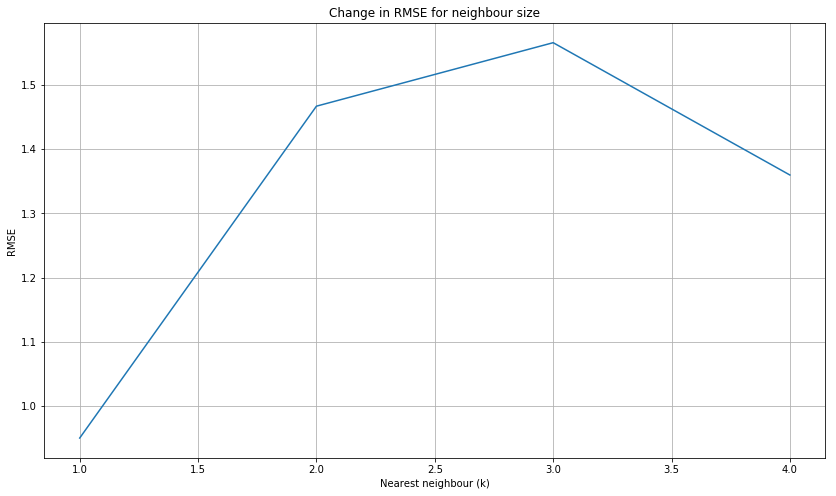

In [44]:
plt.figure(figsize = (14, 8))
plt.plot(k, RMSE_k_list)
plt.xlabel('Nearest neighbour (k)')
plt.ylabel('RMSE')
plt.title('Change in RMSE for neighbour size')
plt.grid()
plt.show()